<a href="https://colab.research.google.com/github/wavallejol/Entropy/blob/main/Sesi%C3%B3n8_MaquinaTermica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>

🔴  🔴  🔴 ⬇️ **Primero importaremos las librerias que utilizaremos** ⬇️ 🔴  🔴  🔴

In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

# **Sesión 8. Máquina Térmica**
***William Vallejo***
# **Objetivo**
 
1.   Obtener el diagrama PV de una Máquina Térmica que opera bajo el ciclo de Carnot.

2. Obtener el diagrama PV para una Máquina Térmica que opera bajo el ciclo de Stirling.

---

# ***Introducción*** 
 
<div align="justify">

Las máquinas térmicas son dispositivos que pueden transformar parte de la energía molécular de las moléculas pertenecientes a un fluido en energía mecánica macroscópica (trabajo). Por lo general el proceso se realiza de manera contínua dentro de un ciclo termodinámico. El fluido absorbe energía en forma de calor desde una fuente de alta temperatura, parte de esta energía es transformada en trabajo por la máquina térmica y el resto de la energía en forma de calor es desechada a un reservorio de baja temperatura (sumidero). El <a href="https://es.wikipedia.org/wiki/Ciclo_de_Carnot"> ciclo de Carnot</a> establece el límite de eficiencia para una máquina térmica que opere en un ciclo termodinámico reversible:
 
$\eta =1- \frac{T_{frio}}{T_{caliente}} \kern 2pc(11)$ 
 
Donde $\small \eta$ representa la eficiencia de la máquina térmica, $T_{caliente}$ la temperatura de la fuente de elevada temperatura, y $T_{frio}$ la temperatura del sumidero. 

El principio de Carnot establece: 
"Ninguna maquina térmica puede ser más eficiente que una máquina térmica reversible, cuando ambas máquinas trabajan en el mismo par de temperaturas" (Levine, 2002).
 
Bajo condiciones de operación reales ninguna máquina será más eficiente que una máquina de carnot.


</div>

#***1. Ciclo de Carnot***

El ciclo de carnot es un ciclo termodinámico de 4 etapas todas reversibles: (1) expansión isotermica, (2) expansión adiabática, (3) compresión isotérmica y (4) compresión adiabática. Este ciclo permitio establecer el proncipio de Carnot y fue el preambulo para la definición que desarrolloraía Clausis de entropía.  

En la siguiente celda de código se simula el diagrama PV de un ciclo de carnot tipico para una maquina termica que opera en entre un foco caliente a 1298 K y un sumidero con una temperatura de 298 K.

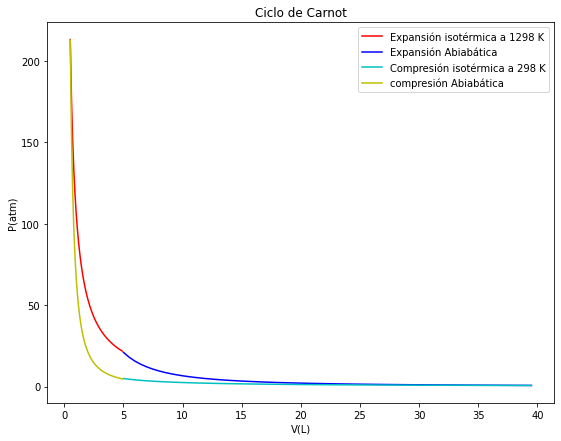

In [3]:
V0= np.arange(0.5,5,0.1)   # Rango Volumen expansión isotérmica
P0=0.08206*1298/V0         # Curva de expansión isoter 
V= np.arange(5,40,0.5)     # Rango Volumen expansión adibática
P3=308.12/V**1.67          # curva expansión adiabática 
P1=0.08206*298/V           # curva compresión isotermica                     
P4=66.812/V0**1.67         # Rango Volumen compresión isotérmica  

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)

plt.plot(V0,P0, "r", label="Expansión isotérmica a 1298 K")
plt.plot(V,P3, "b", label="Expansión Abiabática")
plt.plot(V,P1, "c", label="Compresión isotérmica a 298 K") 
plt.plot(V0,P4, "y", label="compresión Abiabática")
plt.ylabel('P(atm)')
plt.xlabel('V(L)')
plt.title('Ciclo de Carnot')
plt.legend()
plt.savefig("ejercicio", dpi=80) 
plt.show()

 
En la siguiente celda de código se simula la variación de la eficienciade una máquina de Carnot que opera entre un foco frío 298 K y un foco de elevada temperatura  1298 K. Se simula la eficiencia Vs $\small (T_f/T_c)$. 

Explica las tendencia ontenida para la curva de eficiencias Vs $\small (T_f/T_c)$. 

Bajo que condiciones la eficiencia de la maquina de carnot tendria 100 %. ¿Estas condciones son posibles.?

In [4]:
Tf=np.ones(1000)*298 # Tempeartura sumidero (constante)
Tc=np.arange(298,1298,1) # Temperatura caldera (cambia)
e=100*(1-(Tf/Tc))

fig = go.Figure()
fig.add_trace(go.Scatter(x=Tc/Tf, y=e))
fig.update_layout(
    xaxis_title="Relación Tf/Tc",
)

fig.update_layout(
    title="Eficiencia Vs Tf/Tc",
    xaxis_title=r"$ {\mathrm{T_{f}/T_c}} $",
    yaxis_title=r"Eficiencia (%)",
    width=600, height=500
)

fig.show()

#***2. Ciclo de Stirling***

El <a href="https://es.wikipedia.org/wiki/Ciclo_Stirling"> ciclo de Stirling </a> es un ciclo termodinámico de 4 etapas : (1) expansión isotermica, (2) enfriamiento isocorico, (3) compresión isotérmica y (4) calentamiento isocorico. Este ciclo consta de un sistema de regeneración entre los dos procesos isotérmicos. La eificiencia de conversion esta determinada por la siguient ecuación:

$\small e_{Stirling}=\frac{nR(T_c-T_f)ln(r)}{(1-n_R)nC_v(T_c-T_f)+nRT_cln(r)}$

Donde:

$\small r=V_{enfriamiento}/V_{calentamiento}$

$\small n_R=$ eficiencia regenerador


Bajo conndiciones ideales, la efciencia de un <a href="https://es.wikipedia.org/wiki/Motor_Stirling"> motor de Stirling </a>  se apróxima a la eficiencia del ciclo de Carnot:

$\small n({ n_R\to 1})\sim (1-\frac{T_f}{T_c})$

En la siguiente celda de codigo se simulan los parámetros de una máquina que opera bajo un cilo de Stiruling entre un foco frío 298 K y un foco de elevada temperatura a 1298 K. 


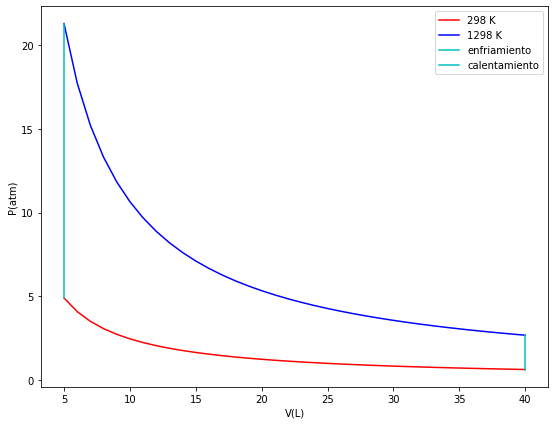

In [5]:
import numpy as np 
import matplotlib.pyplot as plt # importación de bibliotecas
 
V= np.arange(5,41,1)     # definimos el rango de dstos del Volumen
Tc=np.arange(298,1298,1)
V2=np.ones(1000)*40
V1=np.ones(1000)*5 
P1=0.08206*298/V           # determinamos la presión para cada valor de volumen 
P2=0.08206*1298/V
P3=0.08206*Tc/40          # Enfriamiento isocórico
P4=0.08206*Tc/5           # Calentamiento isocórico

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)

plt.plot(V,P1, "r", label="298 K")    # definimos los parametros para graficar la cruva PV
plt.plot(V,P2, "b", label="1298 K")
plt.plot(V2,P3, "c", label="enfriamiento")
plt.plot(V1,P4, "c", label="calentamiento")
plt.ylabel('P(atm)')
plt.xlabel('V(L)')
plt.legend()

plt.show()

En la siguiente celda de código grafica la curva de la eficiencia del motor de Stirling en función de de la eficiencia del regenerador si el motor funciona entre un foco frío a 298 K y un foco de elevada temperatura a 1298 K. 

---
#***Referencias***

*  G. W. Castellan. Physical Chemsitry. Ed. 3rd. Addison-Wesley. 1983. p. 161 - 179.  

*  I. N. Levine. Fisicoquímica. Ed. 5. McGRaw Hill. 2002. p. 94 - 100.  

 
---